In [1]:
# Cell 1: Installation and Setup
#!pip install python-a2a numpy matplotlib seaborn

In [2]:
# Cell 2: Import and Initialize
from python_a2a import AgentNetwork, A2AClient, AIAgentRouter
import time
import matplotlib.pyplot as plt

print("🚀 Initializing Distributed AI Agent Network...")

# Create an intelligent agent network
network = AgentNetwork(name="Professional AI Agent Network")

# Add specialized agents
agents_config = [
    ("AdvancedMath", "http://localhost:4737", "Trigonometric & Mathematical Operations"),
    ("Statistics", "http://localhost:4738", "Statistical Analysis & Data Processing"),
    ("Calculator", "http://localhost:4739", "General Calculations & Arithmetic")
]

for name, url, description in agents_config:
    try:
        network.add(name, url)
        print(f"✅ Connected to {name}: {description}")
    except Exception as e:
        print(f"❌ Failed to connect to {name}: {e}")

🚀 Initializing Distributed AI Agent Network...


INFO:python_a2a.client.network:Added agent 'AdvancedMath' from URL: http://localhost:4737


✅ Connected to AdvancedMath: Trigonometric & Mathematical Operations


INFO:python_a2a.client.network:Added agent 'Statistics' from URL: http://localhost:4738


✅ Connected to Statistics: Statistical Analysis & Data Processing


INFO:python_a2a.client.network:Added agent 'Calculator' from URL: http://localhost:4739


✅ Connected to Calculator: General Calculations & Arithmetic


In [3]:
# Cell 3: Smart Router Setup
router = AIAgentRouter(
    llm_client=A2AClient("http://localhost:5000/openai"),
    agent_network=network
)

print("🧠 AI Router initialized - Ready for intelligent task routing!")

🧠 AI Router initialized - Ready for intelligent task routing!


In [4]:
# Cell 4: Comprehensive Testing Suite
test_queries = [
    "Calculate the sine of 1.5708",
    "Find statistics for numbers: 10, 15, 20, 25, 30, 35, 40",
    "what is 50 + 30 / 6",
    "Analyze this dataset: 5.2, 3.8, 7.1, 4.5, 6.3, 8.9, 2.7",
    "Compute tangent of 0.785398"
]

results = []

print("🔄 Running comprehensive test suite...\n")

for i, query in enumerate(test_queries, 1):
    print(f"Test {i}: {query}")
    
    try:
        # Route the query
        agent_name, confidence = router.route_query(query)
        print(f"  🎯 Routed to: {agent_name} (Confidence: {confidence:.2f})")
        
        # Execute the query
        agent = network.get_agent(agent_name)
        start_time = time.time()
        response = agent.ask(query)
        execution_time = time.time() - start_time
        
        print(f"  ⚡ Response time: {execution_time:.3f}s")
        print(f"  📊 Result: {response}\n")
        
        results.append({
            "query": query,
            "agent": agent_name,
            "confidence": confidence,
            "response": response,
            "execution_time": execution_time
        })
        
    except Exception as e:
        print(f"  ❌ Error: {e}\n")



🔄 Running comprehensive test suite...

Test 1: Calculate the sine of 1.5708
  🎯 Routed to: AdvancedMath (Confidence: 0.50)
  ⚡ Response time: 2.037s
  📊 Result: The sin of 1.5708 is 1.0000000000

Test 2: Find statistics for numbers: 10, 15, 20, 25, 30, 35, 40
  🎯 Routed to: Statistics (Confidence: 0.30)
  ⚡ Response time: 2.033s
  📊 Result: Statistical Analysis Results:
            
📊 Dataset: [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
📈 Count: 7
📊 Mean: 25.0000
📈 Median: 25.0000
📊 Mode: No mode
📈 Standard Deviation: 10.8012
📊 Range: 10.0 - 40.0 (span: 30.0)
            

Test 3: what is 50 + 30 / 6
  🎯 Routed to: AdvancedMath (Confidence: 0.10)
  ⚡ Response time: 2.056s
  📊 Result: Please specify a trigonometric function (sin, cos, or tan)

Test 4: Analyze this dataset: 5.2, 3.8, 7.1, 4.5, 6.3, 8.9, 2.7
  🎯 Routed to: Statistics (Confidence: 0.10)
  ⚡ Response time: 2.020s
  📊 Result: Statistical Analysis Results:
            
📊 Dataset: [5.2, 3.8, 7.1, 4.5, 6.3, 8.9, 2.7]
📈 Count: 7


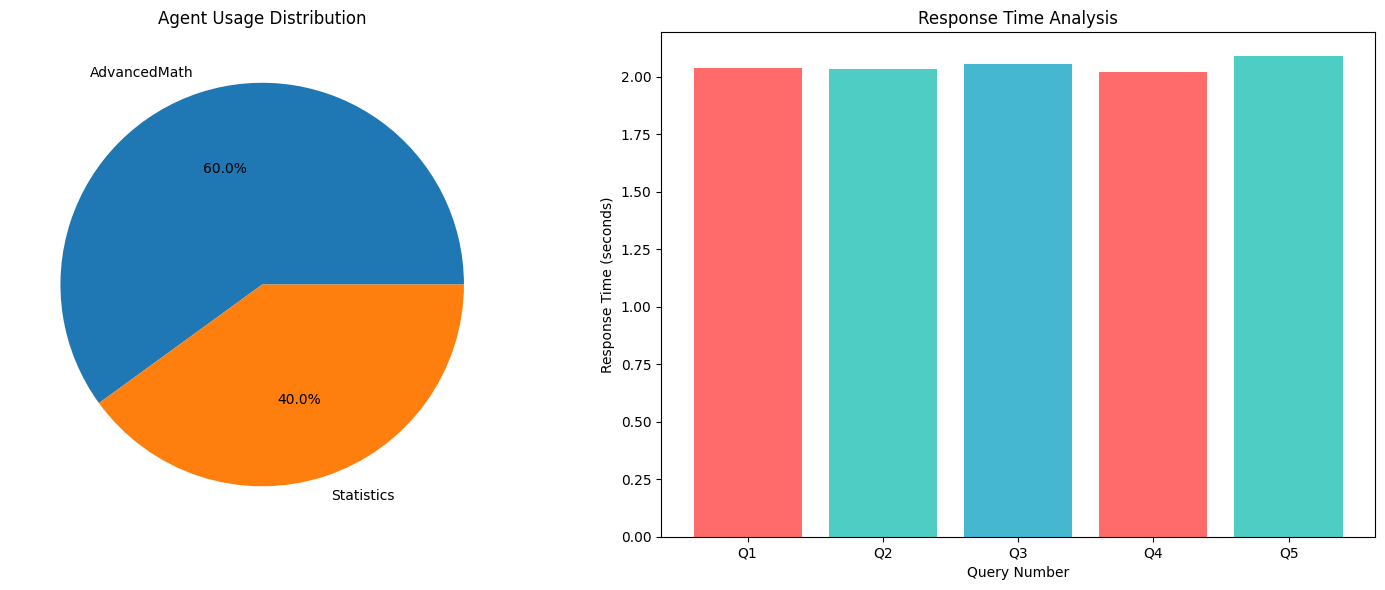

📈 Performance Summary:
   Average Response Time: 2.047s
   Total Queries Processed: 5
   Success Rate: 100.0%


In [5]:
# Cell 5: Performance Visualization
if results:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Agent usage distribution
    agent_counts = {}
    for result in results:
        agent_counts[result['agent']] = agent_counts.get(result['agent'], 0) + 1
    
    ax1.pie(agent_counts.values(), labels=agent_counts.keys(), autopct='%1.1f%%')
    ax1.set_title('Agent Usage Distribution')
    
    # Response times
    agents = [r['agent'] for r in results]
    times = [r['execution_time'] for r in results]
    
    ax2.bar(range(len(results)), times, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax2.set_xlabel('Query Number')
    ax2.set_ylabel('Response Time (seconds)')
    ax2.set_title('Response Time Analysis')
    ax2.set_xticks(range(len(results)))
    ax2.set_xticklabels([f"Q{i+1}" for i in range(len(results))])
    
    plt.tight_layout()
    plt.show()
    
    print(f"📈 Performance Summary:")
    print(f"   Average Response Time: {sum(times)/len(times):.3f}s")
    print(f"   Total Queries Processed: {len(results)}")
    print(f"   Success Rate: {len(results)/len(test_queries)*100:.1f}%")